In [4]:
pip install pytrends

  Using cached pytrends-4.9.2-py3-none-any.whl.metadata (13 kB)
Using cached pytrends-4.9.2-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.0/4.0 MB 3.7 MB/s eta 0:00:01
   --------------- ------------------------ 1.6/4.0 MB 3.5 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.0 MB 3.2 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.0 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 3.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [pytrends]
   ---------------------------------------- 2/2 [pytrends]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)

In [9]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5)

In [10]:
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2025-11-16              100      False
2025-11-30               97      False
2025-11-23               95      False
2025-09-21               93      False
2025-09-28               86      False
2025-11-09               80      False
2025-10-05               77      False
2025-10-12               77      False
2025-11-02               74      False
2025-10-19               73      False


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [11]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2024-01-01 2024-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2024-01-29              100      False
2024-01-03               98      False
2024-01-10               88      False
2024-01-30               87      False
2024-01-23               83      False
2024-01-08               82      False
2024-01-27               81      False
2024-01-09               81      False
2024-01-24               80      False
2024-01-04               79      False


In [12]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", 
                        ascending = False)
data = data.head(10)
print(data)

             Cloud Computing
geoName                     
Ethiopia                 100
Nepal                     96
St. Helena                96
India                     70
Cameroon                  61
Ghana                     48
Sri Lanka                 48
Nigeria                   43
South Korea               39
Pakistan                  39


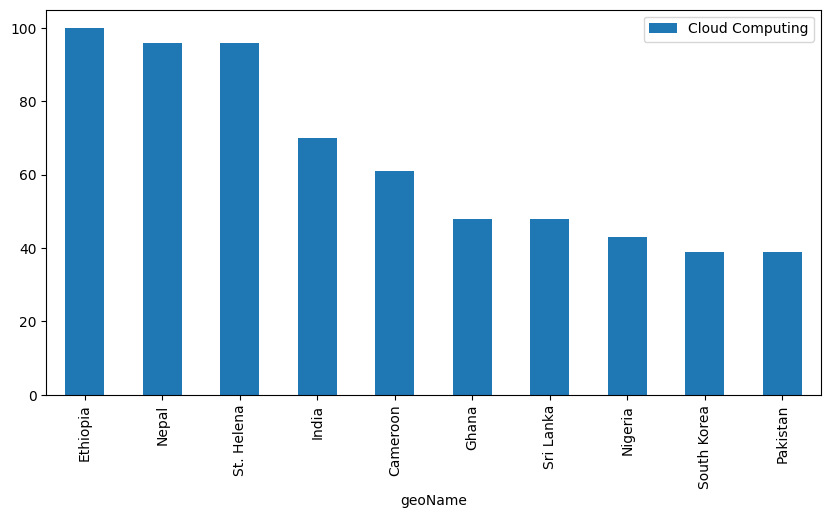

In [13]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [15]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

In [16]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Cloud computing,Topic
1,Cloud computing security,Topic
2,Cloud computing architecture,Topic
3,Serverless computing,Topic
4,Private cloud computing infrastructure,Topic
